# Sandbox
This is a sandbox notebook for testing ideas and tangential bits of code. Not to be run in sequence.

In [3]:
%pylab inline
import pandas as pd
import pandas

Populating the interactive namespace from numpy and matplotlib


In [4]:
!pip install pydicom

     |████████████████████████████████| 7.1MB 1.7MB/s eta 0:00:01


In [5]:
from tciaclient import TCIAClient

In [6]:
KEY = '65547902-6d69-4f5b-9857-fb1e724d3b90' 
client = TCIAClient(apiKey = KEY, baseUrl="https://services.cancerimagingarchive.net/services/v3",resource = "TCIA")

In [7]:
import urllib.request, urllib.error, urllib.parse, urllib.request, urllib.parse, urllib.error,sys
import json

In [8]:
def getResponseString(response):
    if response.getcode() is not 200:
        raise ValueError("Server returned an error")
    else:
        return response.read()

In [9]:
response = client.get_collection_values()
strRespCollections = getResponseString(response)

collections = pandas.io.json.read_json(strRespCollections)

https://services.cancerimagingarchive.net/services/v3/TCIA/query/getCollectionValues?format=json


In [10]:
collections[collections['Collection'].str.contains('Lymph')]

,Collection
50,CT Lymph Nodes


In [11]:
lymph_series_name = collections['Collection'].loc[50]
lymph_series_name

'CT Lymph Nodes'

In [36]:
#Grab the series for CT Lymph Nodes
response = client.get_series(modality="CT", collection=lymph_series_name)
strRespSeries = getResponseString(response)
pdfSeries = pandas.io.json.read_json(strRespSeries)

https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=CT+Lymph+Nodes&Modality=CT&format=json


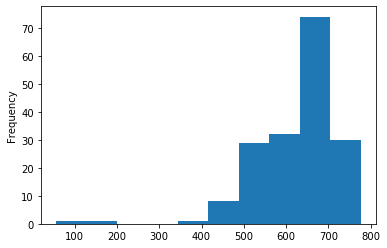

In [44]:
#Looks like the majority of the data sits above
#300 images, with some outliers at the bottom.
pdfSeries['ImageCount'].plot(kind='hist')

In [45]:
#You can filter like this:
pdfSeries[pdfSeries['ImageCount']>300].head()

,BodyPartExamined,Collection,ImageCount,Modality,SeriesDescription,SeriesInstanceUID,StudyInstanceUID,Visibility
0,ABDOMEN,CT Lymph Nodes,717,CT,abdominal_lymph_nodes,61.7.68766114340462632891436074274610210906,61.7.4614721973933394487739198448489366125,1
1,ABDOMEN,CT Lymph Nodes,517,CT,abdominal_lymph_nodes,61.7.189884624733247751868911654633570519535,61.7.128876040172251404065414822554792863476,1
2,MEDIASTINUM,CT Lymph Nodes,524,CT,mediastinal_lymph_nodes,61.7.74372680982822357363687725488894558476,61.7.106011913688873777967000368671613390694,1
3,ABDOMEN,CT Lymph Nodes,661,CT,abdominal_lymph_nodes,61.7.111503609011979038458820141633166596150,61.7.132633651985091577773125743369316426514,1
4,ABDOMEN,CT Lymph Nodes,735,CT,abdominal_lymph_nodes,61.7.136109627500567814530333386506613155124,61.7.280655946894172429784728226992976023531,1


In [63]:
#Filter so each Series in the collection has >300 images.
#We can filter other things too later if we want.
res = pdfSeries[pdfSeries['ImageCount']>300]

In [54]:
#Randomly sample a series UID:
strSeriesUID = pdfSeries.sample(1).SeriesInstanceUID.values[0]
strSeriesUID

'61.7.290841801260861167894792203663273391457'

In [55]:
#How big is this series? BIG.
response = client.get_series_size(SeriesInstanceUID=strSeriesUID)
pandas.io.json.read_json(getResponseString(response))

https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeriesSize?SeriesInstanceUID=61.7.290841801260861167894792203663273391457&format=json


,ObjectCount,TotalSizeInBytes
0,677,355703946


In [75]:
def download_series(uid, download_dir, zip_name):
    response = client.get_image(strSeriesUID, download_dir, zip_name)
    strResponseImage = getResponseString(response)

In [73]:
import os
if not os.path.isdir(f'./{lymph_series_name}'):
    os.mkdir(f'./{lymph_series_name}')

In [76]:
uids = res.SeriesInstanceUID
download_dir = f'./{lymph_series_name}'
for uid in uids:
    print(f'Downloading {uid}...')
    zip_name = uid
    download_series(uid, download_dir, zip_name)

https://services.cancerimagingarchive.net/services/v3/TCIA/query/getImage?SeriesInstanceUID=61.7.290841801260861167894792203663273391457


KeyboardInterrupt: 

In [12]:

import zipfile

In [15]:
zipfilePath = ("./CT Lymph Node/61.7.189884624733247751868911654633570519535")
z = zipfile.ZipFile(zipfilePath)
z.extractall("./CT Lymph Node/")
z.close()

FileNotFoundError: [Errno 2] No such file or directory: './CT Lymph Node/61.7.189884624733247751868911654633570519535'

aws_from_scratch.ipynb	download_ct.py	tcia_api_testing.ipynb
aws_quickinit.txt	kaggle_data	tciaclient.py
cancer_ic.ipynb		__pycache__	TCIA-Python3-Downloader
cancer_ic.py		README.md	using_cli.ipynb
CT Lymph Nodes		ssh_keys


In [31]:
import pandas as pd
import pandas
from tciaclient import TCIAClient
import zipfile

KEY = '65547902-6d69-4f5b-9857-fb1e724d3b90' 
client = TCIAClient(apiKey = KEY, baseUrl="https://services.cancerimagingarchive.net/services/v3",resource = "TCIA")

In [32]:
def getResponseString(response):
    try:
        return response.read()
    except:
        pass
    
def download_series(uid, download_dir, zip_name):
    response = client.get_image(uid, download_dir, zip_name)
    strResponseImage = getResponseString(response)
    
    
    
response = client.get_collection_values()
strRespCollections = getResponseString(response)
collections = pandas.io.json.read_json(strRespCollections)

lymph_series_name = collections['Collection'].loc[50]


#Grab the series for CT Lymph Nodes
response = client.get_series(modality="CT", collection=lymph_series_name)
strRespSeries = getResponseString(response)
pdfSeries = pandas.io.json.read_json(strRespSeries)

#Filter so each Series in the collection has >300 images.
#We can filter other things too later if we want.
res = pdfSeries[pdfSeries['ImageCount']>300]

https://services.cancerimagingarchive.net/services/v3/TCIA/query/getCollectionValues?format=json
https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=CT+Lymph+Nodes&Modality=CT&format=json


In [33]:
res

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,Collection,Visibility,ImageCount
0,61.7.68766114340462632891436074274610210906,61.7.4614721973933394487739198448489366125,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,717
1,61.7.189884624733247751868911654633570519535,61.7.128876040172251404065414822554792863476,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,517
2,61.7.74372680982822357363687725488894558476,61.7.106011913688873777967000368671613390694,CT,mediastinal_lymph_nodes,MEDIASTINUM,CT Lymph Nodes,1,524
3,61.7.111503609011979038458820141633166596150,61.7.132633651985091577773125743369316426514,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,661
4,61.7.136109627500567814530333386506613155124,61.7.280655946894172429784728226992976023531,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,735
5,61.7.216182644644958482448771540990900905603,61.7.149009310196866941444185777099208597752,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,696
6,61.7.212101888059942679496406227616932192594,61.7.219665827073622418000902319748617882908,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,493
7,61.7.102821090586639164486750605848666065663,61.7.326036326246674117441683891827861539052,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,485
8,61.7.240105796420479562831943199885820616300,61.7.82274660831845815651285301905965015269,CT,abdominal_lymph_nodes,ABDOMEN,CT Lymph Nodes,1,691
9,61.7.178964818681337758599703390927532543012,61.7.172066327064917168997199390748496462893,CT,mediastinal_lymph_nodes,MEDIASTINUM,CT Lymph Nodes,1,457


In [35]:
res.to_csv('./data/ct_lymph_nodes_series_data.csv')

In [42]:
import os

root = 'data/CT Lymph Nodes/'
for path in os.listdir(root):
    if '.zip' not in path:
        new_path = os.path.join(root,path)
        f = os.listdir(path)[0]
        annot_name = dicom.dcmread(os.path.join(new_path,f)).PatientName
        print(annot_name)


FileNotFoundError: [Errno 2] No such file or directory: '61.7.91905844422421701161237158452768346088'

In [57]:
import os

paths = [os.path.join('data/CT Lymph Nodes/',d) for d in os.listdir('data/CT Lymph Nodes/') if '.zip' not in d]

annot_names = [dicom.dcmread(os.path.join(p,os.listdir(p)[0])).PatientName for p in old_paths]

name_map = dict(zip(annot_names, paths))


In [18]:
import pydicom as dicom

In [29]:
for f in os.listdir(path):
dicom.dcmread(os.path.join(path,os.listdir(path)[0])).PatientName
    

ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LYMPH_003
ABD_LY